<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Inversion About the Mean </b></font>
<br>
_prepared by Abuzer Yakaryilmaz and Özlem Salehi_
<br><br>
[<img src="../qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/RIL2lAwraUA)
<br><br><br>

We play a simple game to give some ideas about how Grover's search algorithm works.

We have a list of N elements. 

Some of them are marked.

At the beginning each has a value of 1.

 Each iteration of the game has two phases:

<ol>
    <li><b>Query</b>: In this phase, we assume that each marked element is detected, and then its sign is flipped.</li>
    <li><b>Inversion</b>: In this phase, the value of each element is reflected over the mean of all values.</li>
</ol>

<h3>Task 1</h3>

We play this game for $ N = 8 $.

Suppose that only the 4th element is marked.

We can visualize the values of elements in the list in the beginning as follows.

<BarContainer object of 8 artists>

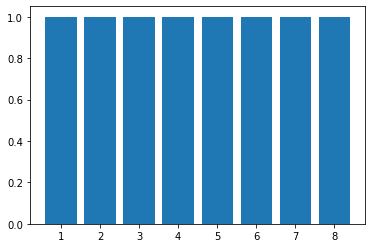

In [15]:
from matplotlib.pyplot import bar

labels = []
elements = []
for i in range(8):
    labels = labels + [i+1]
    elements  = elements + [1]
# visualize the values of elements in the list 
bar(labels,elements)

Iterate the game for one step and visualize the values of elements in the list after each phase.

1st step - query phase:

<BarContainer object of 8 artists>

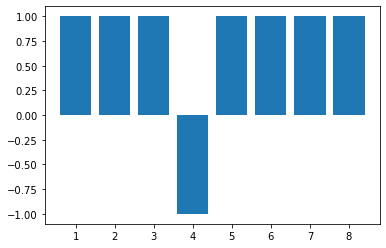

In [16]:
# 
# 1st step - query
#

# change the sign of the marked element, i.e., multiply it by -1
label_marked=3
elements[label_marked]*=-1
    
# visualize the values of elements in the list 
bar(labels,elements)

1st step - inversion phase:

0.75


<BarContainer object of 8 artists>

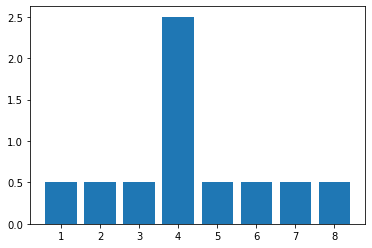

In [17]:
#
# 1st step - inversion
#

# calculate the mean of all values 
mean=0
for i in range(len(elements)):
    mean+=elements[i]
mean=mean/len(elements)
print(mean) 
# then reflect each element over the mean, e.g.:
#   if the mean is 0, then the reflection of 3 is -3
#   if the mean is 1, then the reflection of 3 is -1
#   if the mean is -1, then the reflection of 3 is -5
# if the mean is -1, then the reflection of -4 is 3
for i in range(len(elements)):
    if elements[i]>mean:
        elements[i]=mean-abs(mean-elements[i])
    else:
        elements[i]=mean+abs(mean-elements[i])

# visualize the values of elements in the list 
bar(labels,elements)

Iterate the game for one more step and visualize the values of elements in the list after each phase.

2nd step - query phase:

<BarContainer object of 8 artists>

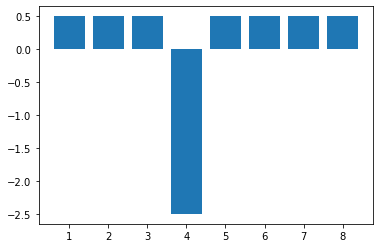

In [18]:
# 
# 2nd step - query
#

label_marked=3
elements[label_marked]*=-1
# visualize the values of elements in the list 
bar(labels,elements)

2nd step - inversion phase:

0.125


<BarContainer object of 8 artists>

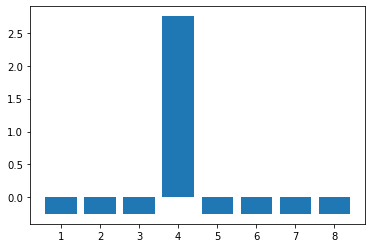

In [19]:
#
# 2nd step - inversion
#
mean=0
for i in range(len(elements)):
    mean+=elements[i]
mean=mean/len(elements)
print(mean) 
# then reflect each element over the mean, e.g.:
#   if the mean is 0, then the reflection of 3 is -3
#   if the mean is 1, then the reflection of 3 is -1
#   if the mean is -1, then the reflection of 3 is -5
# if the mean is -1, then the reflection of -4 is 3
for i in range(len(elements)):
    if elements[i]>mean:
        elements[i]=mean-abs(mean-elements[i])
    else:
        elements[i]=mean+abs(mean-elements[i])

# visualize the values of elements in the list 
bar(labels,elements)

Iterate the game three more steps and visualize the values of elements in the list at the end.

-0.5625
-0.96875
-0.890625


<BarContainer object of 8 artists>

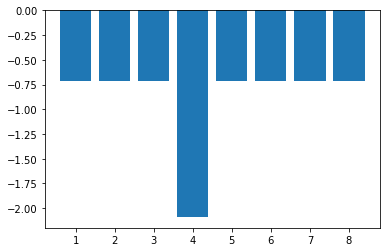

In [20]:
for i in range(3):
    label_marked=3
    elements[label_marked]*=-1
    mean=0
    for i in range(len(elements)):
        mean+=elements[i]
    mean=mean/len(elements)
    print(mean) 
# then reflect each element over the mean, e.g.:
#   if the mean is 0, then the reflection of 3 is -3
#   if the mean is 1, then the reflection of 3 is -1
#   if the mean is -1, then the reflection of 3 is -5
# if the mean is -1, then the reflection of -4 is 3
    for i in range(len(elements)):
        if elements[i]>mean:
            elements[i]=mean-abs(mean-elements[i])
        else:
            elements[i]=mean+abs(mean-elements[i])


# visualize the values of elements in the list 
bar(labels,elements)

<a href="Q84_Inversion_About_the_Mean_Solutions.ipynb#task1">click for our solution</a>

<a id="task2"></a>
<h3>Task 2</h3>

Write a function called *query* that 
- takes a list of elements and the list of marked elements,
- change the sign of the marked elements, and then
- returns the list.

Write a function called *inversion* that
- takes a list of elements and
- reflects the value of each element over the mean of all values, and then
- return the list.

We iterate the same game given in Task 1 ($ N = 8 $ and the 4th element is the only marked one) 20 steps by using the functions *query* and *inversion*. 

**This time we trace the values of only the 4th element. We store the values of the 4th element on a list after each step, and then, we display this list as a bar chart.**

In [2]:
def query(elements,marked_elements):
    for i in range(len(marked_elements)):
        elements[marked_elements[i]]*=-1
    return elements

In [3]:
def inversion (elements):
    mean=0
    for i in range(len(elements)):
        mean+=elements[i]
    mean=mean/len(elements) 
    for i in range(len(elements)):
        if elements[i]>mean:
            elements[i]=mean-abs(mean-elements[i])
        else:
            elements[i]=mean+abs(mean-elements[i])   
    return elements

C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


<BarContainer object of 21 artists>

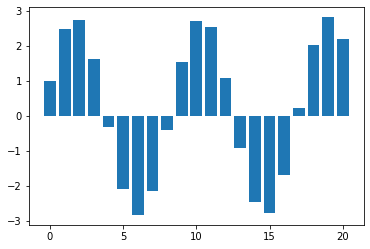

In [3]:
from matplotlib.pyplot import bar

# define the list of size 8 on which each element has value of 1
elements = []
for i in range(8):
    elements  = elements + [1]

# index of the marked element
marked_elements = [3]
    
# define the list of iterations
iterations = []
# the list storing the values of the 4th element after each step
L = []

# the first values
iterations.append(0)
L.append(elements[marked_elements[0]])

for step in range(20):
    # store the iteration
    iterations.append(step+1)
    query(elements,marked_elements)
    inversion (elements)
    L.append(elements[marked_elements[0]])
# visualize the values of the 4th elements after each iterations
bar(iterations,L)

<a href="Q84_Inversion_About_the_Mean_Solutions.ipynb#task2">click for our solution</a>

<h3>Task 3</h3>

Repeat Task 2 where $ N = 16 $ and the 11th element is marked.

<BarContainer object of 21 artists>

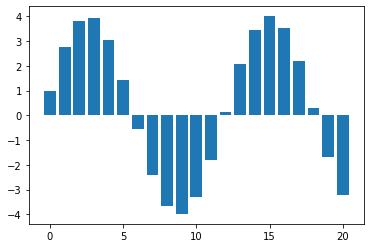

In [4]:
from matplotlib.pyplot import bar

# define the list of size 8 on which each element has value of 1
elements = []
for i in range(16):
    elements  = elements + [1]

# index of the marked element
marked_elements = [10]
    
# define the list of iterations
iterations = []
# the list storing the values of the 4th element after each step
L = []

# the first values
iterations.append(0)
L.append(elements[marked_elements[0]])

for step in range(20):
    # store the iteration
    iterations.append(step+1)
    query(elements,marked_elements)
    inversion (elements)
    L.append(elements[marked_elements[0]])
# visualize the values of the 4th elements after each iterations
bar(iterations,L)

<a href="Q84_Inversion_About_the_Mean_Solutions.ipynb#task3">click for our solution</a>

<h3>Task 4</h3>

Repeat Task 3 by tracing only the 5th element where $ N = 16 $ and the 5th, 8th, and 10th elements are marked.

<BarContainer object of 21 artists>

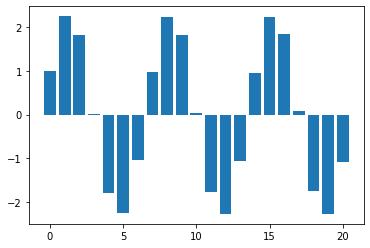

In [5]:
from matplotlib.pyplot import bar

# define the list of size 8 on which each element has value of 1
elements = []
for i in range(16):
    elements  = elements + [1]

# index of the marked element
marked_elements = [4,7,9]
    
# define the list of iterations
iterations = []
# the list storing the values of the 4th element after each step
L = []

# the first values
iterations.append(0)
L.append(elements[marked_elements[0]])

for step in range(20):
    # store the iteration
    iterations.append(step+1)
    query(elements,marked_elements)
    inversion (elements)
    L.append(elements[marked_elements[0]])
# visualize the values of the 4th elements after each iterations
bar(iterations,L)

<a href="Q84_Inversion_About_the_Mean_Solutions.ipynb#task4">click for our solution</a>

<h3>Task 5</h3>

We iterate the same game 20 steps where $ N = 16 $ and the marked elements are the first four elements. 

Print the length of the list of elements (_i.e., consider it as a vector_) after each query and inversion phases. 

*Remark that the initial length is $ \sqrt{ \sum_{i=1}^{N} 1^2 } = \sqrt{N} = \sqrt{16}  =4 $.*

In [20]:
from matplotlib.pyplot import bar

# define the list of size 8 on which each element has value of 1
elements = []
for i in range(16):
    elements  = elements + [1]

# index of the marked element
marked_elements = [0,1,2,3]
    
# define the list of iterations
iterations = []
# the list storing the values of the 4th element after each step
L = []

# the first values
iterations.append(0)
L.append(elements[marked_elements[0]])

for step in range(20):
    # store the iteration
    iterations.append(step+1)
    query(elements,marked_elements)
    suma=0
    for i in range(len(elements)):
        suma+=elements[i]**2
    print('Step',step+1,':the length of the list elements is',suma**0.5,'after the query phase')
    inversion (elements)
    suma=0
    for i in range(len(elements)):
        suma+=elements[i]**2
    print('Step',step+1,':the length of the list elements is',suma**0.5,'after the inversion phase')
    print()
# visualize the values of the 4th elements after each iterations
#bar(iterations,L)

Step 1 :the length of the list elements is 4.0 after the query phase
Step 1 :the length of the list elements is 4.0 after the inversion phase

Step 2 :the length of the list elements is 4.0 after the query phase
Step 2 :the length of the list elements is 4.0 after the inversion phase

Step 3 :the length of the list elements is 4.0 after the query phase
Step 3 :the length of the list elements is 4.0 after the inversion phase

Step 4 :the length of the list elements is 4.0 after the query phase
Step 4 :the length of the list elements is 4.0 after the inversion phase

Step 5 :the length of the list elements is 4.0 after the query phase
Step 5 :the length of the list elements is 4.0 after the inversion phase

Step 6 :the length of the list elements is 4.0 after the query phase
Step 6 :the length of the list elements is 4.0 after the inversion phase

Step 7 :the length of the list elements is 4.0 after the query phase
Step 7 :the length of the list elements is 4.0 after the inversion phase


<a href="Q84_Inversion_About_the_Mean_Solutions.ipynb#task5">click for our solution</a>

<h3>Task 6 </h3>

Repeat Task 5 where $ N = 10 $ and the last element is marked.

*Remark that the initial length is $ \sqrt{10} $.*

In [32]:
from matplotlib.pyplot import bar

# define the list of size 8 on which each element has value of 1
elements = []
for i in range(10):
    elements  = elements + [1]

# index of the marked element
marked_elements = [9]
    
# define the list of iterations
iterations = []
# the list storing the values of the 4th element after each step
L = []

# the first values
iterations.append(0)
L.append(elements[marked_elements[0]])

for step in range(20):
    # store the iteration
    iterations.append(step+1)
    query(elements,marked_elements)
    suma=0
    for i in range(len(elements)):
        suma+=elements[i]**2
    print('Step',step+1,':the length of the list elements is %.3f'% suma**0.5,'after the query phase')
    inversion (elements)
    suma=0
    for i in range(len(elements)):
        suma+=elements[i]**2
    print('Step',step+1,':the length of the list elements is %.3f'% suma**0.5,'after the inversion phase')
    print()
# visualize the values of the 4th elements after each iterations
#bar(iterations,L)

Step 1 :the length of the list elements is 3.162 after the query phase
Step 1 :the length of the list elements is 3.162 after the inversion phase

Step 2 :the length of the list elements is 3.162 after the query phase
Step 2 :the length of the list elements is 3.162 after the inversion phase

Step 3 :the length of the list elements is 3.162 after the query phase
Step 3 :the length of the list elements is 3.162 after the inversion phase

Step 4 :the length of the list elements is 3.162 after the query phase
Step 4 :the length of the list elements is 3.162 after the inversion phase

Step 5 :the length of the list elements is 3.162 after the query phase
Step 5 :the length of the list elements is 3.162 after the inversion phase

Step 6 :the length of the list elements is 3.162 after the query phase
Step 6 :the length of the list elements is 3.162 after the inversion phase

Step 7 :the length of the list elements is 3.162 after the query phase
Step 7 :the length of the list elements is 3.16

<a href="Q84_Inversion_About_the_Mean_Solutions.ipynb#task6">click for our solution</a>

### Length preserving game

As observed from the last two tasks, each phase of the game is a length preserving operator (function).

*Do you think that query and inversion operators are linear? More specifically, can we represent them in the form of a matrix?*

The answer for the query operator is easy as it only changes the sign of marked elements, and so its matrix form is very similar to an Identity matrix having -1 in some of the diagonal entries.

<h3> Modified Game </h3>

In this part, we restrict the game by guaranteeing that the list represents a quantum state.

<h3> Task 7</h3>

What are the initial values for the modified game if $ N=8 $?

<a href="Q84_Inversion_About_the_Mean_Solutions.ipynb#task7">click for our solution</a>

<h3> Task 8</h3>

Iterate the modified game for 20 steps where $ N = 8 $ and the second element is marked.

Print the list of elements after each phase.

Check whether the length of list is 1 after each iteration.

In [4]:
from matplotlib.pyplot import bar

# define the list of size 8 on which each element has value of 1
elements = []
for i in range(8):
    elements  = elements + [1/(8**0.5)]

# index of the marked element
marked_elements = [1]
    
# define the list of iterations
iterations = []
# the list storing the values of the 4th element after each step
L = []

# the first values
iterations.append(0)
L.append(elements[marked_elements[0]])

for step in range(20):
    # store the iteration
    iterations.append(step+1)
    query(elements,marked_elements)
    suma=0
    for i in range(len(elements)):
        suma+=elements[i]**2
    print('Step',step+1,':the list of elements is',elements,'after the query phase')
    print('Step',step+1,':the length of the list elements is %.3f'% suma**0.5,'after the query phase')
    print()
    inversion (elements)
    suma=0
    for i in range(len(elements)):
        suma+=elements[i]**2
    print('Step',step+1,':the list of elements is',elements,'after the inversion phase')
    print('Step',step+1,':the length of the list elements is %.3f'% suma**0.5,'after the inversion phase')
    print()
    print()
# visualize the values of the 4th elements after each iterations
#bar(iterations,L)

Step 1 :the list of elements is [0.35355339059327373, -0.35355339059327373, 0.35355339059327373, 0.35355339059327373, 0.35355339059327373, 0.35355339059327373, 0.35355339059327373, 0.35355339059327373] after the query phase
Step 1 :the length of the list elements is 1.000 after the query phase

Step 1 :the list of elements is [0.17677669529663687, 0.8838834764831842, 0.17677669529663687, 0.17677669529663687, 0.17677669529663687, 0.17677669529663687, 0.17677669529663687, 0.17677669529663687] after the inversion phase
Step 1 :the length of the list elements is 1.000 after the inversion phase


Step 2 :the list of elements is [0.17677669529663687, -0.8838834764831842, 0.17677669529663687, 0.17677669529663687, 0.17677669529663687, 0.17677669529663687, 0.17677669529663687, 0.17677669529663687] after the query phase
Step 2 :the length of the list elements is 1.000 after the query phase

Step 2 :the list of elements is [-0.08838834764831839, 0.9722718241315027, -0.08838834764831839, -0.088388

<a href="Q84_Inversion_About_the_Mean_Solutions.ipynb#task8">click for our solution</a>

<h3> Task 9</h3>

Repeat Task 8 for $ N = 16 $ where the first 12 elements are marked.

In [37]:
from matplotlib.pyplot import bar

# define the list of size 8 on which each element has value of 1
elements = []
for i in range(16):
    elements  = elements + [1/(16**0.5)]

# index of the marked element
marked_elements =[]
for i in range(12):
    marked_elements.append(i)
    
# define the list of iterations
iterations = []
# the list storing the values of the 4th element after each step
L = []

# the first values
iterations.append(0)
L.append(elements[marked_elements[0]])

for step in range(20):
    # store the iteration
    iterations.append(step+1)
    query(elements,marked_elements)
    suma=0
    for i in range(len(elements)):
        suma+=elements[i]**2
    print('Step',step+1,':the list of elements is',elements,'after the query phase')
    print('Step',step+1,':the length of the list elements is %.3f'% suma**0.5,'after the query phase')
    print()
    inversion (elements)
    suma=0
    for i in range(len(elements)):
        suma+=elements[i]**2
    print('Step',step+1,':the list of elements is',elements,'after the inversion phase')
    print('Step',step+1,':the length of the list elements is %.3f'% suma**0.5,'after the inversion phase')
    print()
    print()
# visualize the values of the 4th elements after each iterations
#bar(iterations,L)

Step 1 :the list of elements is [-0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, 0.25, 0.25, 0.25, 0.25] after the query phase
Step 1 :the length of the list elements is 1.000 after the query phase

Step 1 :the list of elements is [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, -0.5, -0.5, -0.5] after the inversion phase
Step 1 :the length of the list elements is 1.000 after the inversion phase


Step 2 :the list of elements is [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.5, -0.5, -0.5, -0.5] after the query phase
Step 2 :the length of the list elements is 1.000 after the query phase

Step 2 :the list of elements is [-0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, 0.25, 0.25, 0.25, 0.25] after the inversion phase
Step 2 :the length of the list elements is 1.000 after the inversion phase


Step 3 :the list of elements is [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2

<a href="Q84_Inversion_About_the_Mean_Solutions.ipynb#task9">click for our solution</a>

## Grover's quantum search algorithm

The modified game is the main part of Grover's quantum search algorithm.

Suppose that we are given an unordered list and we make a search of a specific element called as marked.
- We access the list via an oracle: we can make queries to the list.
- If there are $ N $ elements in the list, we use $ \log(N) $ qubits. (Assume that $N$ is a power of 2.) 
- Each basis state, i.e., $ \ket{0 \cdots 0}, \ldots, \ket{1 \cdots 1} $, corresponds to an index of the list.
- If the searched element is detected, then the oracle flips the sign of the corresponding amplitude.

<i style="color:blue;">Remark that, in the above games, we simulate the oracle with the pre-knowledge of marked element(s). In the real implementation, the oracle should have a quantum mechanism detecting the marked elements while being in a superposition of all indices, and then the sign(s) of the corresponding amplitude(s) is (are) flipped automatically. This is indeed the main technological challenge for implementing Grover's search algorithm.</i>

At the beginning, Hadamard operator is applied to each qubit. Thus, the amplitude of each basis state is set to $ \frac{1}{\sqrt{N}} $.
- We can interpret this as all elements start the game with the same amplitude.
- Then, the game starts to iterate, and the amplitudes of marked and unmarked elements are changed.

<h4> The number of iterations </h4>

When the number of marked elements are less than the unmarked elements, the amplitudes of marked elements start to increase. 

Then, we reach the first peak such that the probability of observing a marked element takes its maximum value. 

After passing this point, the amplitudes of marked elements start to decrease.

<h4> Phases </h4>

The operator in each phase is unitary (linear).

The unitary matrix in the query phase depends on the input, but the unitary operator in the inversion phase does not depend on the input.

<b>In the query phase</b>, the amplitudes of the marked elements change sign.  

<b>In the inversion phase</b>, for each amplitude $ x $, the new value is calculated as $ mean - (x - mean) = 2mean -x $.

The mean of a column vector of size $ N $ can be calculated by multiplying it with the following row vector from the left:

$$  \myvector{ \frac{1}{N} ~~ \frac{1}{N} ~~ \cdots ~~ \frac{1}{N}} . $$


When considering all elements in the list, we work with a matrix. The matrix for the second phase should be 

$$ D = 2 \mymatrix{ccc}{
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    \vdots & \ddots & \vdots \\
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    } 
- I . $$

<h3> Task 10</h3>

Convince yourself that $ D \myvector{x_1 \\ \vdots \\ x_N} = \myvector{ 2m-x_1 \\ \vdots \\ 2m-x_N } $, where $ m = \dfrac{ \sum_{i=1}^N x_i } { N} $.

<h3> Task 11</h3>

Let $ A =  \mymatrix{ccc}{
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    \vdots & \ddots & \vdots \\
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    }  $. 
Convince yourself that $ A^2 = A $ and $ D^T = D $.

Since $ D = 2A - I $, convince yourself that $ D $ is unitary by showing that $ D^T \cdot D = I $, i.e., $ (2A-I)(2A-I) = I $.

## General form of Grover's search algorithm

Let's assume that there are $N=2^n$ elements in a list $L$, and one of the elements is marked. 

Suppose that there exists a function $f$ whose domain is $L$ with the following properties:
\begin{align*}
f(x)&=1 &\mbox{ if $x$ is marked}\\
f(x)&=0 &\mbox{ otherwise}
\end{align*}

Grover's algorithm can also be defined in more general form: for the given function $f$, it finds the element $x$ such that $f(x)=1$.

_Do you see how does this correspond to finding the marked element?_

We access the list by querying $f$, which will be called the <font color="blue">oracle</font>.

Normally, in the worst case you would have to query $f$ for all possible inputs to find $x$ satisfying $f(x)=1$ which has <font color="blue"> query complexity </font>$O(N)$. 

Grover's algorithm is able to perform the same task only with $O(\sqrt{N})$ queries.

(<i>$O(N)$ is Big O notation. Please check the definition if you are seeing it for the first time.</i>)

**Remark:** The algorithm works if there are multiple marked elements but we assume that only 1 element is marked for simplicity.

### Example

Grover's algorithm is not restricted to a list. You can apply it to any search space as long as you can construct such a function $f$. Consider the picture below. A, B, C and D are the cities and the numbers represent the distance between them.

<img src="images/tsp.png" width="300">

**Question:** <i>Starting in A, does there exist a path of distance < 900 which visits all cities exactly once and returns to A?</i>

This is known as the decision version of Traveling Salesman Problem. In this example the search space consists of all possible routes such as ABDCA, ACBDA, ABCDA etc. and our aim is to find the route whose total distance is < 900.

Check ABCDA. The total distance is 800 which satisfies the condition. If you want to design $f$ for this problem, $f(\text{ABCDA})=1$ and $f(x)=0$ for all other routes. 

**How can you construct such an $f$ ?** 

Add the distances between each pair of cities and output 1 if the total distance is less than 900 and 0 otherwise. Note that we don't need to know anything about the solution to implement $f$.

Of course you should be able to design such an $f$ in the quantum setting if you want to apply Grover's Search and it is not always an easy task. 

**How does Grover's Search help in this problem?** 

Checking all routes one by one is a long procedure. But given a route, you can easily check if the total distance satisfies the condition. Instead of checking all routes one by one and querying $f$ for each route, it is enough to make square root queries if you use Grover's Search.

Check this [link](https://github.com/quantum-challenge/2019/blob/master/problems/final/Final_en.ipynb) to see another example.